### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: CHINA, GERMANY, ITALY, SOUTH KOREA, JAPAN, USA, AUSTRALIA

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6


Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


219

### Number of RECOVERED in the first outbreak day

In [3]:
y_dat_all_recovered[0]

28.0

### Number of RECOVERED in the latest outbreak day

In [4]:
y_dat_all_recovered[-1]

15997281

### New Recovered in the World changed by day

('Last day Increasing', 202840)

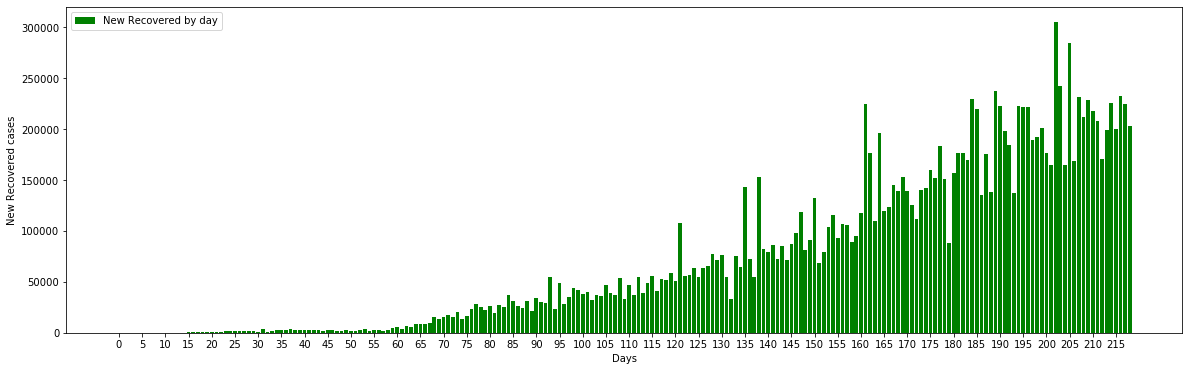

In [5]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.legend()
('Last day Increasing', y_dat_all_recovered[-1]-y_dat_all_recovered[-2])

Text(0, 0.5, 'New Recovered cases in log_values')

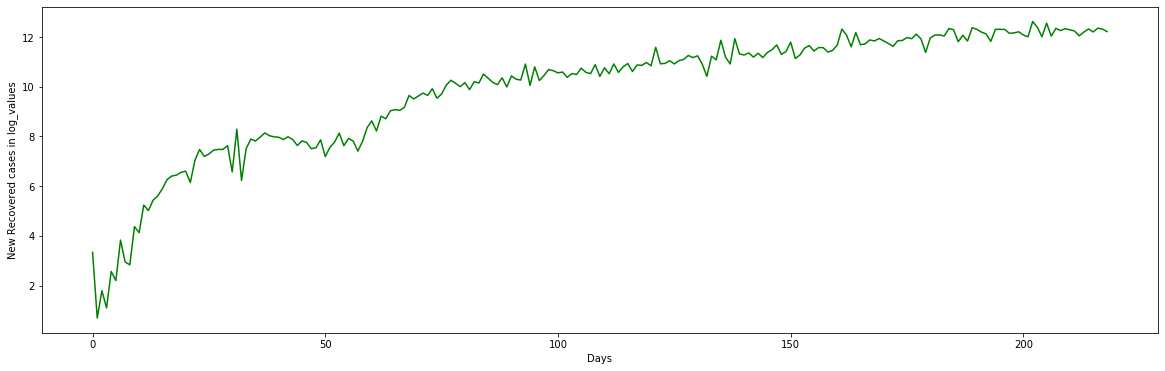

In [6]:
plt.plot(x_dat, np.log(newRecoveredByDay), color='green')
plt.xlabel('Days')
plt.ylabel('New Recovered cases in log_values')

Last day (%):  65.422
Highest Ratio until now (%):  65.422


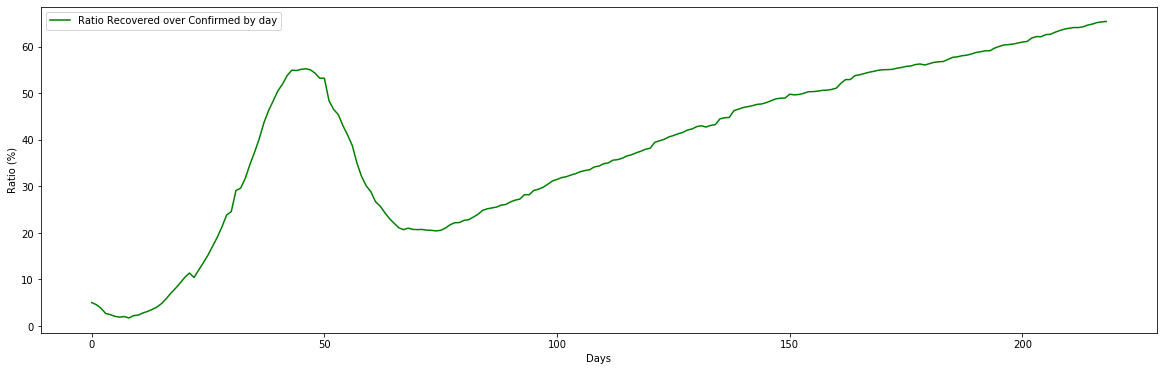

In [7]:
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.legend()
print("Last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))

### Number of RECOVERED in the World from day 0 to latest day

('Total Confirmed', 15997281)

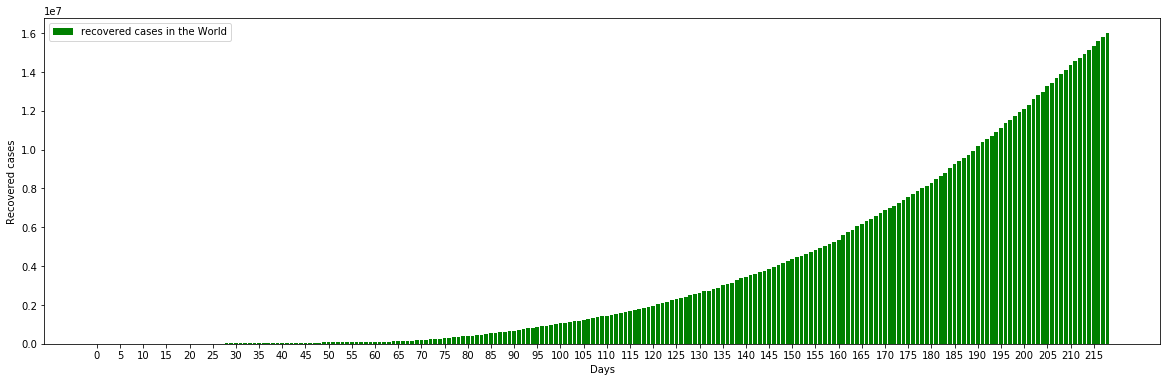

In [8]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_all_recovered, color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend()
('Total Confirmed', y_dat_all_recovered[-1])

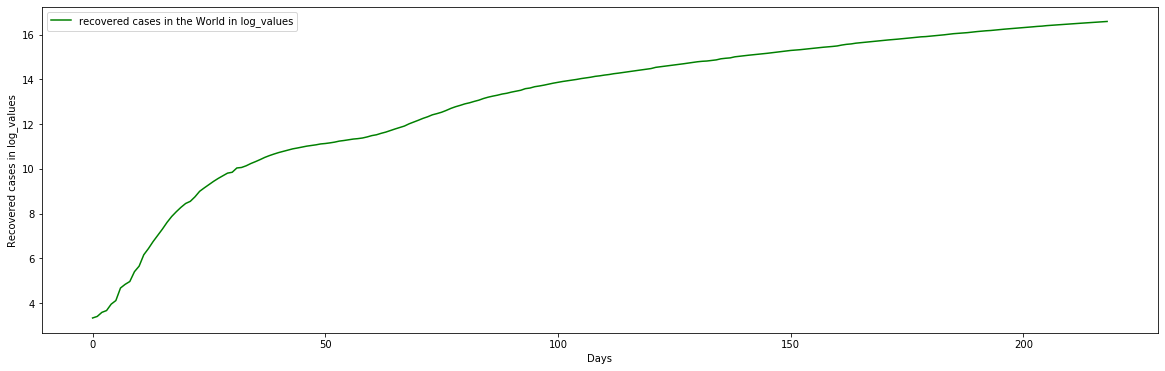

In [9]:
plt.plot(x_dat, np.log(y_dat_all_recovered), color='green', label='recovered cases in the World in log_values')
plt.xlabel('Days')
plt.ylabel('Recovered cases in log_values')
plt.legend()

### Number of RECOVERED in CHINA from day 0 to latest day 

(('Last day Increasing', 84), ('Total Confirmed', 84335))

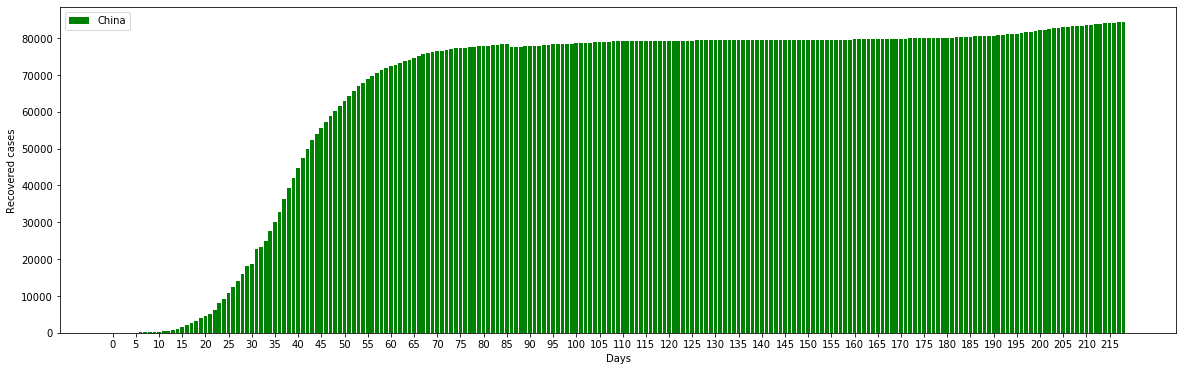

In [10]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_recovered['China'], color='green')
plt.legend(["China"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['China'][-1]-y_dat_recovered['China'][-2]), ('Total Confirmed', y_dat_recovered['China'][-1])

#### Notes: it seems there were bias at day 84 and day 85

### Number of RECOVERED in GERMANY from day 0 to latest day 

(('Last day Increasing', 1218), ('Total Confirmed', 212909))

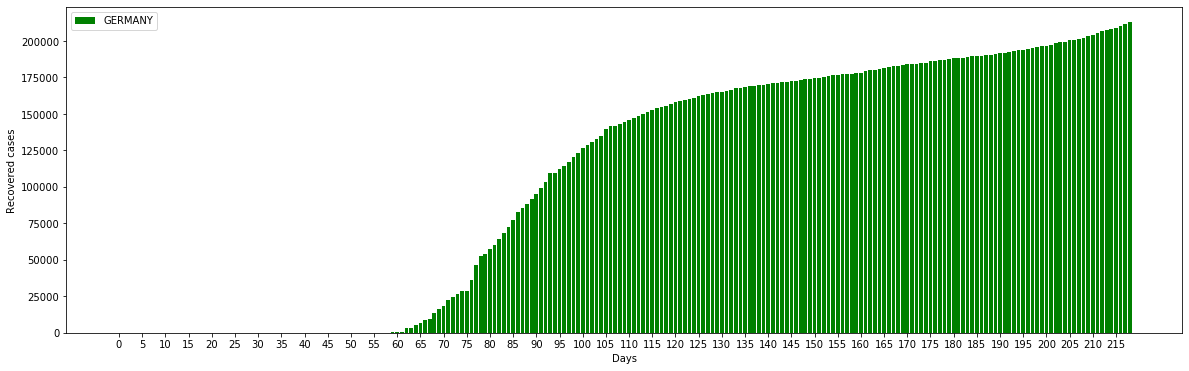

In [11]:
plt.bar(x_dat, y_dat_recovered['Germany'], color='green')
plt.legend(["GERMANY"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['Germany'][-1]-y_dat_recovered['Germany'][-2]), ('Total Confirmed', y_dat_recovered['Germany'][-1])

### Number of RECOVERED in ITALY from day 0 to latest day

(('Last day Increasing', 225), ('Total Confirmed', 206554))

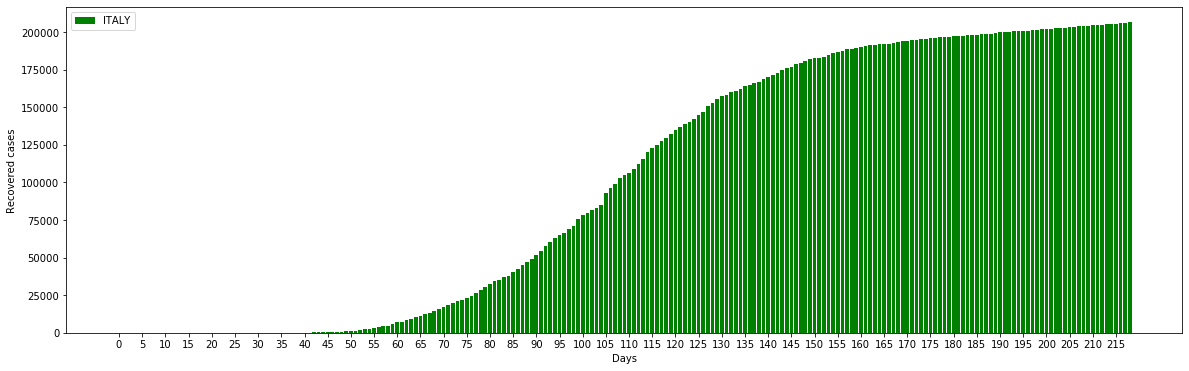

In [12]:
plt.bar(x_dat, y_dat_recovered['Italy'], color='green')
plt.legend(["ITALY"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['Italy'][-1]-y_dat_recovered['Italy'][-2]), ('Total Confirmed', y_dat_recovered['Italy'][-1])

### Number of RECOVERED in SOUTH KOREA from day 0 to latest day 

(('Last day Increasing', 90), ('Total Confirmed', 14551))

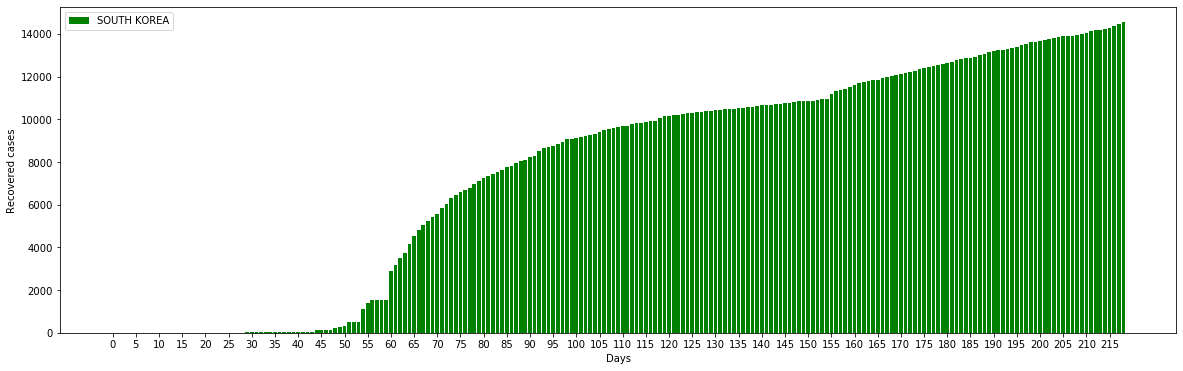

In [13]:
plt.bar(x_dat, y_dat_recovered['Korea, South'], color='green')
plt.legend(["SOUTH KOREA"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['Korea, South'][-1]-y_dat_recovered['Korea, South'][-2]), ('Total Confirmed', y_dat_recovered['Korea, South'][-1])

#### In above chart, it seems there was data bias at days 44 and 45 in Korea because at day 46 the total number of recovered has been adjusted lower. 


### Number of RECOVERED in JAPAN from day 0 to latest day 

(('Last day Increasing', 1135), ('Total Confirmed', 52542))

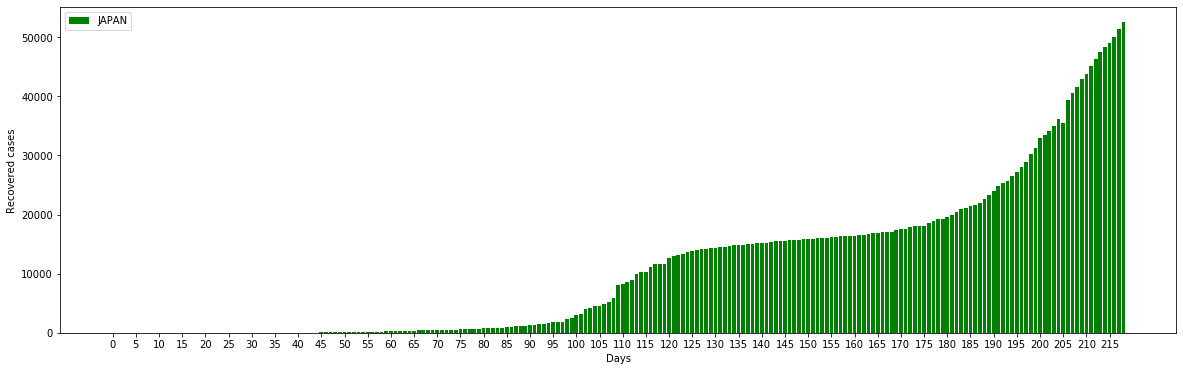

In [14]:
plt.bar(x_dat, y_dat_recovered['Japan'], color='green')
plt.legend(["JAPAN"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['Japan'][-1]-y_dat_recovered['Japan'][-2]), ('Total Confirmed', y_dat_recovered['Japan'][-1])

### Number of RECOVERED in the USA from day 0 to latest day 

(('Last day Increasing', 16861), ('Total Confirmed', 2101326))

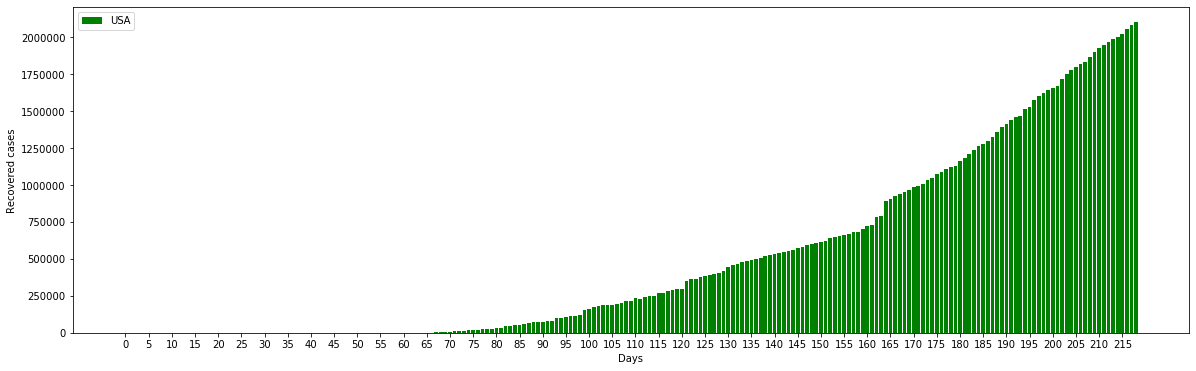

In [15]:
plt.bar(x_dat, y_dat_recovered['US'], color='green')
plt.legend(["USA"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['US'][-1]-y_dat_recovered['US'][-2]), ('Total Confirmed', y_dat_recovered['US'][-1])

#### Note: bias at days 61, 62 no data is given (Stand: 25.03.2020)

### Number of RECOVERED in the Australia from day 0 to latest day 

(('Last day Increasing', 266), ('Total Confirmed', 20365))

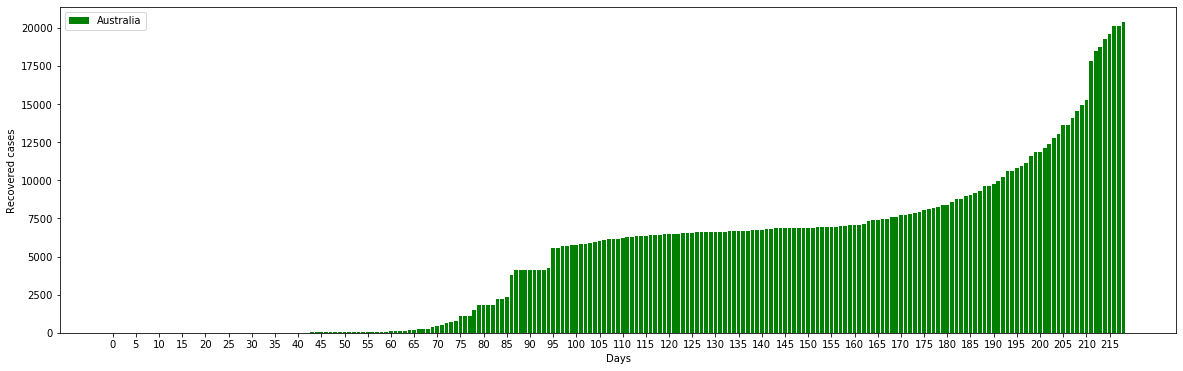

In [16]:
plt.bar(x_dat, y_dat_recovered['Australia'], color='green')
plt.legend(["Australia"])

plt.xticks(np.arange(0, max(x_dat)+1, 5))
# plt.yticks(np.arange(0, max(y_dat_recovered_au)+1, 2))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
('Last day Increasing', y_dat_recovered['Australia'][-1]-y_dat_recovered['Australia'][-2]), ('Total Confirmed', y_dat_recovered['Australia'][-1])